# App Reviews Sentiment Analysis

In [8]:
#import necessary libraries to work with
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# for sentiment analysis from review text
#install packages for textblob and wordcloud using -> pip install {package_name} 
from textblob import TextBlob   
from wordcloud import WordCloud  

In [9]:
data_reviews = pd.read_csv('linkedin-reviews.csv')
data_reviews.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [10]:
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


#### Exploratory data analysis

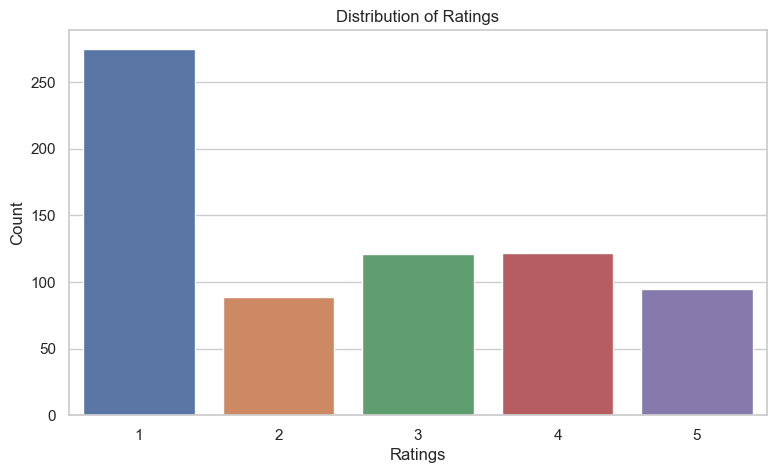

In [14]:
#lets see the Ditribution of Ratings
sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
sns.countplot(data=data_reviews, x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

From above figure we get a general idea about the distribution of ratings (from 1 to 5)

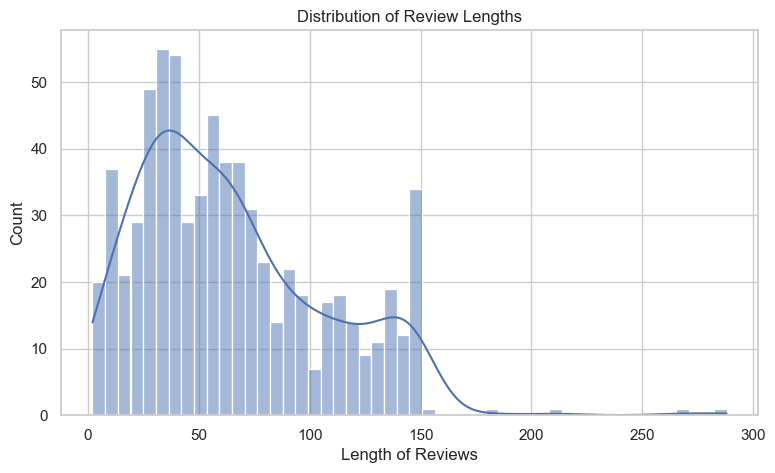

In [21]:
# Lets see the distribution of length of reviews
data_reviews['Review Length'] = data_reviews['Review'].apply(len)
plt.figure(figsize=(9,5))
#kde-> (Kernel Density Estimation) adds a smoothed line to the plot, representing the estimated probability density function of the data.
sns.histplot(data_reviews['Review Length'], bins=50, kde=True) 
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Reviews')
plt.ylabel('Count')
plt.show()

In [24]:
#### Adding Sentiment Labels to the Data using the textblob library
def textblob_sentiment_analysis(review):
    #analyse the sentiment of the review
    sentiment = TextBlob(review).sentiment
    #assign text based on polarity of sentiment
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

#Apply Sentiment analysis to the reviews using above
data_reviews['Sentiment'] = data_reviews['Review'].apply(textblob_sentiment_analysis)
data_reviews.head(10)

,Review,Rating,Review Length,Sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative
1,Force close(galaxy tab),1,23,Neutral
2,Slow and it tries to upload your contacts with...,1,61,Negative
3,Add ability to customize the profile and move ...,4,90,Neutral
4,"Good app, but it's a pain that it's not possib...",4,133,Positive
5,This app is poor and bad. Linkedin app on my H...,1,68,Negative
6,Finally,5,7,Neutral
7,Have been using DroidIn. Ability to move to SD...,4,97,Neutral
8,Works fine on Samsung Captivate.,4,32,Positive
9,Clean design with limited features. How about ...,3,98,Positive


### Analysing App Review Sentiment

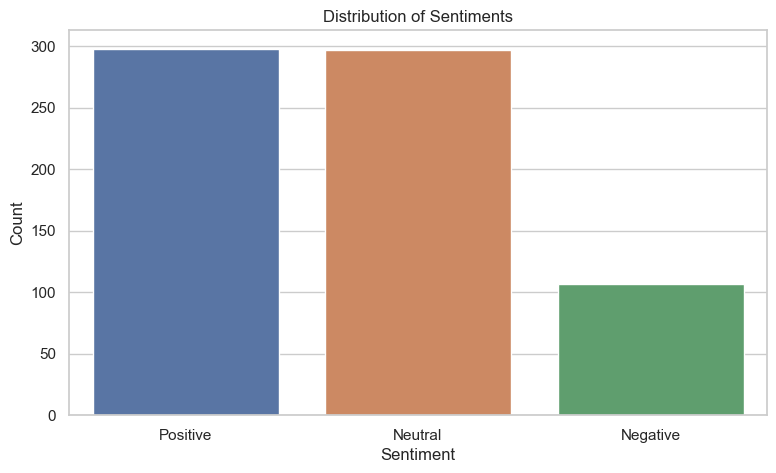

In [32]:
# Analysing the distribution of sentiments 
plt.figure(figsize=(9,5))
sns.countplot(data=data_reviews, x='Sentiment', order=data_reviews['Sentiment'].value_counts().index)

##alternate way is by plotting a barplot
#sentiment_distribution = data_reviews['Sentiment'].value_counts()
#sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)

plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

We can see that even if the app has low ratings, user don't use negatives words much in the reviews

###### Exploring the replationship between the ratings and the sentiments of the reviews to see if there is any correlation between the variables

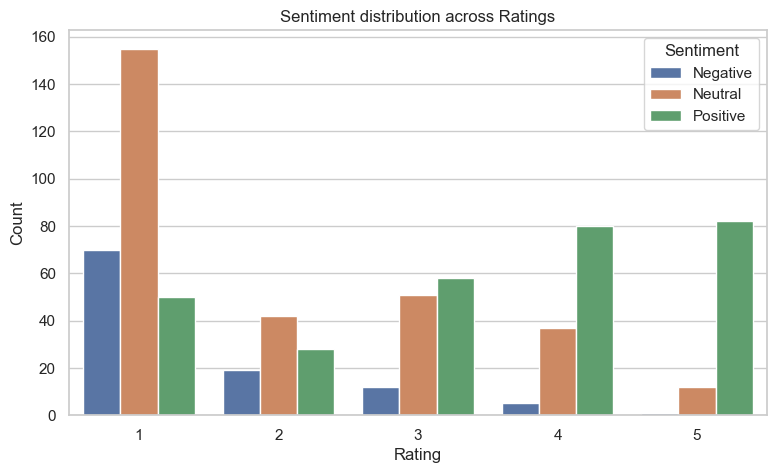

In [35]:
plt.figure(figsize=(9,5))
sns.countplot(data=data_reviews, x='Rating', hue='Sentiment')
plt.title('Sentiment distribution across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

###### Text analysis to identify common words or themes within each sentiment category

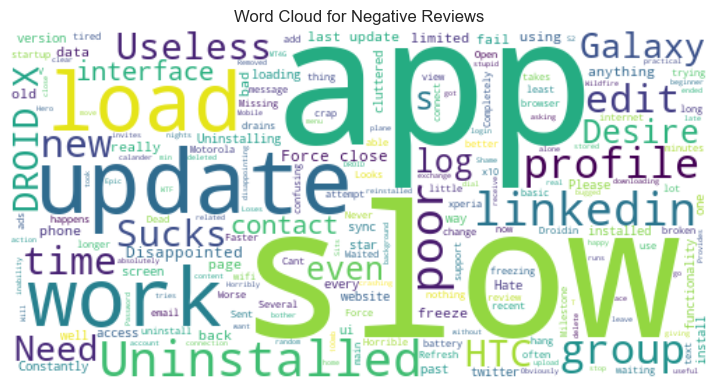

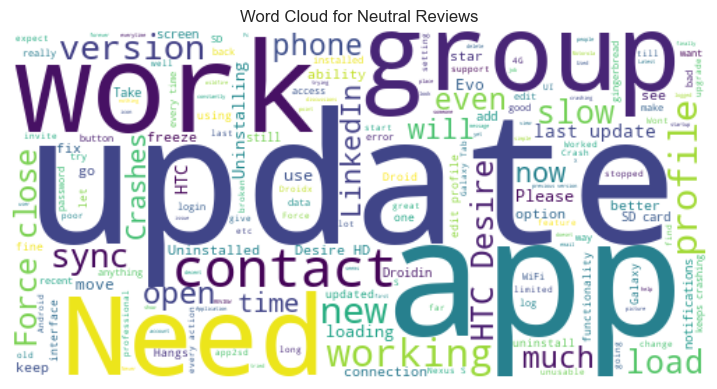

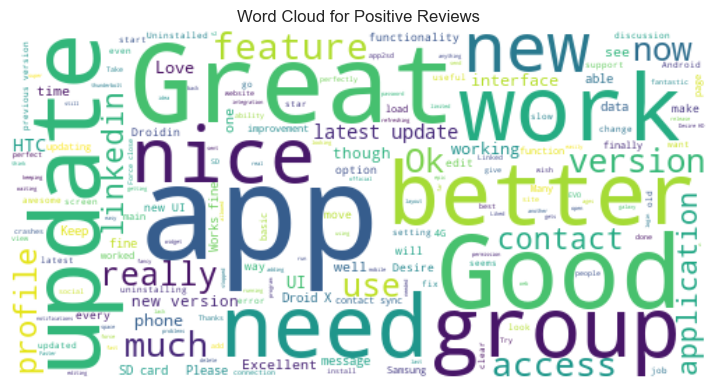

In [50]:
def generate_word_cloud(sentiment):
    #text is a string which comprises of Reviews under the sentiment (parameter passed) concatenated into a single string 
    text = ' '.join(review for review in data_reviews[data_reviews['Sentiment']==sentiment]['Review'])
    wordcloud = WordCloud(width=500, height=250, background_color='white').generate(text)
    plt.figure(figsize=(9,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()
    
group_sentiments = data_reviews.groupby('Sentiment')
    
for sentiment, sentiment_data in group_sentiments:
#alternate code instead of groupby logic
#for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)

### Summary

App Reviews Sentiment Analysis is a valuable tool for app developers and businesses to understand user feedback, prioritize feature updates, and maintain a positive user community. It involves using data analysis techniques to determine whether the sentiments in these reviews are positive, negative, or neutral.